In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# from scope_fun import *

# Loading the Dataset

As the dataset is so huge, we won't work on the whole dataset for performance reason and will first work on samples of the data

In [31]:
data = pd.read_csv('./data/CleanGithubRepo2.csv')
data.shape

(192060, 16)

In [146]:
# df = data.sample(frac=.25, random_state=1398)
df = data.copy()
df.shape

(192060, 16)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48015 entries, 187678 to 83061
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Size               48015 non-null  float64
 1   Stars              48015 non-null  int64  
 2   Forks              48015 non-null  int64  
 3   Issues             48015 non-null  int64  
 4   Watchers           48015 non-null  int64  
 5   HasIssues          48015 non-null  int64  
 6   HasProjects        48015 non-null  int64  
 7   HasDownloads       48015 non-null  int64  
 8   HasWiki            48015 non-null  int64  
 9   HasDiscussions     48015 non-null  int64  
 10  Maintained         48015 non-null  int64  
 11  Age                48015 non-null  int64  
 12  IsPopularLang      48015 non-null  int64  
 13  DescSize           48015 non-null  int64  
 14  recent_(0.0, 2.0]  48015 non-null  int64  
 15  recent_(2.0, 4.0]  48015 non-null  int64  
dtypes: float64(1), int64(1

In [34]:
df

,Size,Stars,Forks,Issues,Watchers,HasIssues,HasProjects,HasDownloads,HasWiki,HasDiscussions,Maintained,Age,IsPopularLang,DescSize,"recent_(0.0, 2.0]","recent_(2.0, 4.0]"
187678,0.002368,171,60,1,171,1,1,1,1,0,0,2,1,9,1,0
134478,0.000394,258,96,17,258,1,1,1,0,0,0,13,1,8,1,0
59303,0.040369,646,89,0,646,1,1,1,1,0,0,4,0,4,1,0
144356,0.094719,237,58,12,237,1,0,1,0,0,0,5,1,9,1,0
174726,0.000028,187,4,1,187,1,1,1,1,0,0,5,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,0.029466,83772,25514,191,83772,1,0,1,1,0,0,9,1,4,1,0
152731,0.009768,221,68,3,221,1,1,1,1,0,0,2,1,7,1,0
148231,0.000090,229,18,26,229,1,1,1,1,0,0,2,1,7,1,0
38008,0.104812,1031,401,139,1031,1,1,1,1,0,0,7,1,5,1,0


In [50]:
# data['Size'] = (data['Size'] / (1024 * 1024))

In [66]:
# data.to_csv("./data/CleanGithubRepo2.csv",index=False)

# Removing Outliers

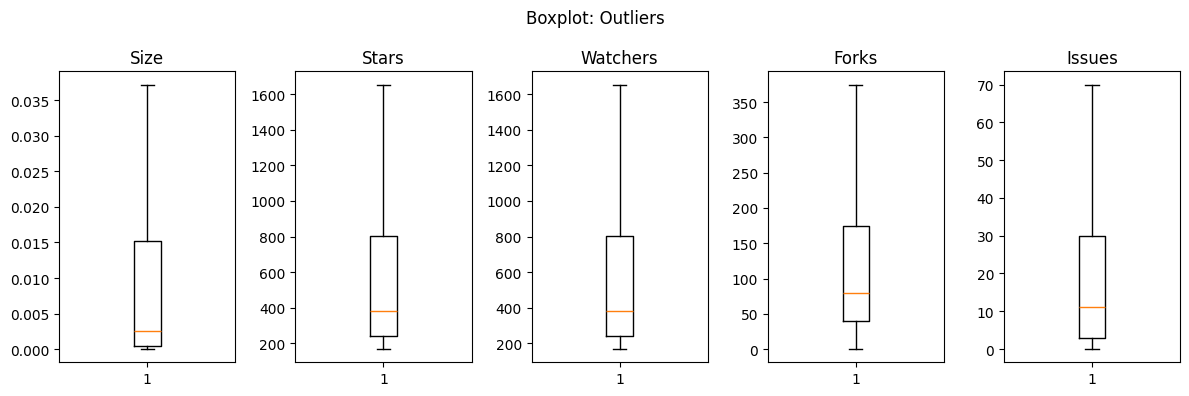

In [156]:
fig, axes = plt.subplots(nrows=1,ncols=5, figsize=(12, 4))
for i,f in enumerate(['Size','Stars','Watchers','Forks','Issues']):
    axes[i].boxplot(df[f])
    axes[i].set_title(f)
fig.suptitle("Boxplot: Outliers")
plt.tight_layout()
# plt.axis('off')

In [148]:
def remove_outliers(dataFrame, col):
    Q1 = dataFrame[col].quantile(0.25)
    Q3 = dataFrame[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    if dataFrame[col].dtype in ['int32','int64']:
        lower_fence, upper_fence = int(lower_fence), int(upper_fence)

    outliers = dataFrame[col].where(
        (dataFrame[col] < lower_fence) & (dataFrame[col] > upper_fence))

    status = 'Removed'
    try:
        for i, d in dataFrame.iterrows():
            if d[col] < lower_fence:
                df.at[i, col] = lower_fence
            elif d[col] > upper_fence:
                df.at[i, col] = upper_fence
    except:
        status = 'Not Removed'
    finally:
        print(f"{col:<10}{status:>10}")

In [149]:
print(f"{'Column':<10}{'Status':>10}")
for c in ['Size','Stars','Watchers','Forks','Issues']:
    remove_outliers(df, c)

Column        Status
Size         Removed
Stars        Removed
Watchers     Removed
Forks        Removed
Issues       Removed


# Creating a Popularity Score

A Popular Repo will have the following features --

- Increases Popularity
  - Stars
  - Forks
  - Watching
  - Downloads
  - Discussions (Indicates an active community)

- Decreases Popularity
  - Issues

- Not Necessary
  - Number of Branches
  - Pages
  - Template

- Improve QoL
  - Wiki

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [159]:
mss = MinMaxScaler(feature_range=(-10,10))
ss_fit = mss.fit_transform(df[['Stars','Forks','Watchers','Issues']])
df[['Stars','Forks','Watchers','Issues']] = pd.DataFrame(ss_fit,columns=['Stars','Forks','Watchers','Issues'])

In [162]:
df['popular_score'] = (df['Stars']+df['Forks']) / (1+df['Issues'])

In [164]:
df[['popular_score','Stars','Forks','Issues']].sort_values('popular_score').sample(10)

,popular_score,Stars,Forks,Issues
68590,3.508681,-4.825269,-2.693333,-3.142857
133636,1.604463,-8.750000,-4.773333,-9.428571
3653,1.818182,10.000000,10.000000,10.000000
77385,1.643814,-5.752688,-6.693333,-8.571429
151492,2.742586,-9.247312,-7.600000,-7.142857
123135,2.391508,-8.413978,-6.960000,-7.428571
70234,1.061870,-5.013441,-4.240000,-9.714286
186188,2.807527,-9.919355,-9.733333,-8.000000
191127,1.959987,-9.986559,-6.533333,-9.428571
64263,1.538233,-4.287634,-6.480000,-8.000000


In [167]:
df['popular_score'].describe()

count    192060.000000
mean          1.334073
std          11.556620
min        -140.000000
25%           0.244851
50%           1.813425
75%           2.346275
max         140.000000
Name: popular_score, dtype: float64

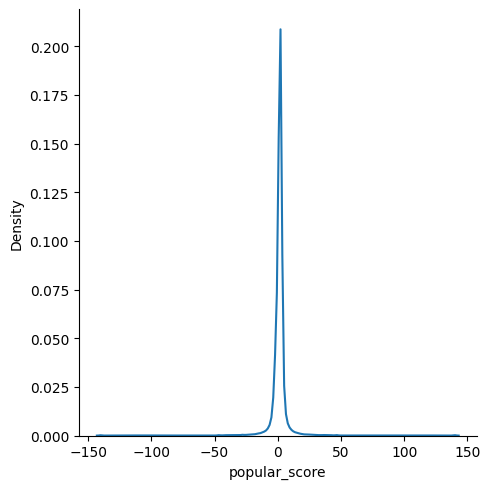

In [168]:
sns.displot(data=df,x='popular_score',kind='kde')

In [ ]:
for i,d in df.iterrows():
    if d['popular_score'] < df['popular_score'].median():
        df.at[i,'Popular'] = 0
    else:
        df.at[i,'Popular'] = 1
    print(i)

In [171]:
# df.to_csv("./data/ScaledScore.csv",index=False)

In [130]:
ss_fit['Cat'].value_counts()

Cat
Popular        24876
Not Popular    23139
Name: count, dtype: int64

In [145]:
corr_mat_int = ss_fit[['test_score','Stars','Forks','Issues']].corr(method='pearson')
px.imshow(
    corr_mat_int,
    text_auto=True,
    aspect='auto',
    color_continuous_scale='purp'
)

# Models

## Random Forest

## XGBOOST

## KNN

## Logistic Regression

## SVM